# Procesado de Imágenes de Satélite


In [1]:
# Importar Librerias
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

## Crear un ndarray a partir de la imagen

In [2]:
from skimage import data

image_file = '../images/california.jpg'
photo_data = misc.imread(image_file)

type(photo_data)


C:\Users\pherm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


numpy.ndarray

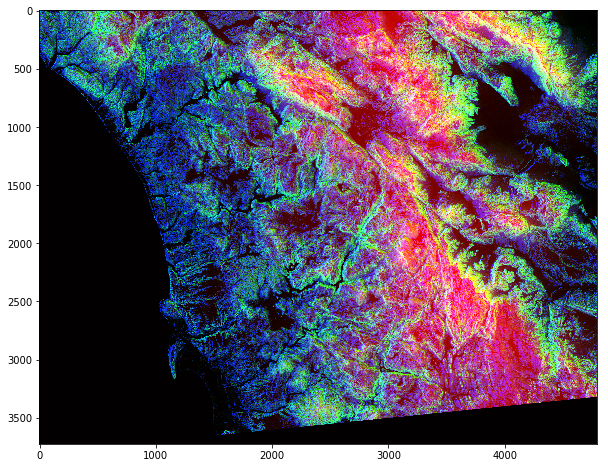

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

In [4]:
photo_data.shape

#print(photo_data)

(3725, 4797, 3)

# Características de la Imagen
Tenemos una matriz de 3725x4797 pixeles x 3 colores.

Los colores se especifican en un vector de 3 valores: (Red, Green, Blue).
- Red: especifica la altitud
- Green: especifica la pendiente
- Blue: especifica la orientación de la pendiente

In [5]:
photo_data.size

53606475

In [6]:
photo_data.min(), photo_data.max()

(0, 255)

In [7]:
photo_data.mean()

75.8299354508947

# Consultar un Pixel de la Imagen

In [8]:
photo_data[150, 250]

array([ 17,  35, 255], dtype=uint8)

In [9]:
photo_data[150, 250, 1]

35

# Modificar un Pixel con ceros

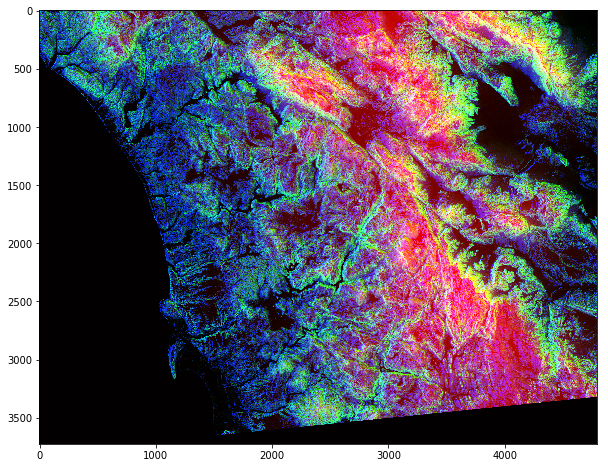

In [10]:
#photo_data = misc.imread(image_file)
photo_data[150, 250] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

# Modificar un rango de pixels

C:\Users\pherm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


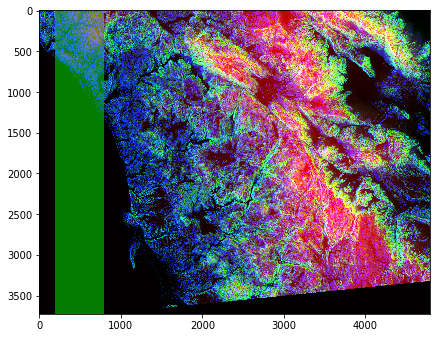

In [11]:
photo_data = misc.imread(image_file)

photo_data[:, 200:800, 1] = 125
plt.figure(figsize=(7,7))
plt.imshow(photo_data)

C:\Users\pherm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


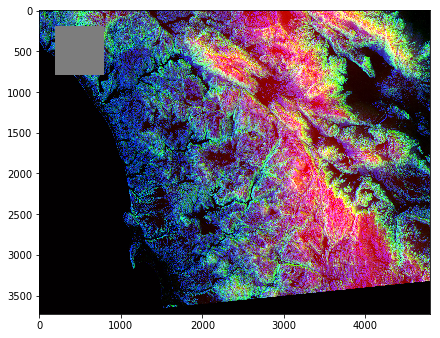

In [12]:
photo_data = misc.imread(image_file)

photo_data[200:800, 200:800] = 125
plt.figure(figsize=(7,7))
plt.imshow(photo_data)

C:\Users\pherm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


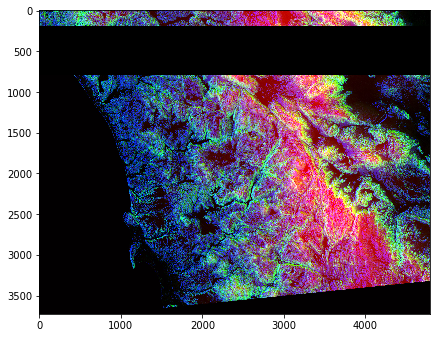

In [13]:
photo_data = misc.imread(image_file)

photo_data[200:800, :] = 0
plt.figure(figsize=(7,7))
plt.imshow(photo_data)

# Filtrar pixels por intensidad

In [14]:
photo_data = misc.imread(image_file)
print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 125
print("Shape of low_value_filter:", low_value_filter.shape)

C:\Users\pherm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


Shape of photo_data: (3725, 4797, 3)
Shape of low_value_filter: (3725, 4797, 3)


In [15]:
low_value_filter[100,100,2]

False

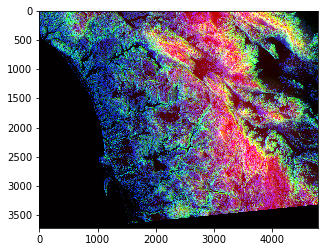

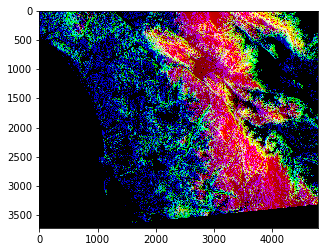

In [16]:
plt.figure(figsize=(5,5))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

# Filtrado de Imágenes

<img src="../images/circle.png" align="left" style="width:550px;height:330px;"/>

In [20]:
total_rows, total_cols, total_layers = photo_data.shape
total_rows, total_cols, total_layers = (12, 12, 3)
print("photo_data = ", photo_data.shape)

X, Y = np.ogrid[:total_rows, :total_cols]
print("X = ", X.shape, " and Y = ", Y.shape)

photo_data =  (3725, 4797, 3)
X =  (12, 1)  and Y =  (1, 12)


In [21]:
center_row, center_col = total_rows / 2, total_cols / 2
#print("center_row = ", center_row, "AND center_col = ", center_col)
#print(X - center_row)
#print(Y - center_col)
dist_from_center = (X - center_row)**2 + (Y - center_col)**2
print(dist_from_center)
radius = (total_rows / 2)**2
#print("Radius = ", radius)
circular_mask = (dist_from_center > radius)
#print(circular_mask)
print(circular_mask[0:100,0:100])

[[72. 61. 52. 45. 40. 37. 36. 37. 40. 45. 52. 61.]
 [61. 50. 41. 34. 29. 26. 25. 26. 29. 34. 41. 50.]
 [52. 41. 32. 25. 20. 17. 16. 17. 20. 25. 32. 41.]
 [45. 34. 25. 18. 13. 10.  9. 10. 13. 18. 25. 34.]
 [40. 29. 20. 13.  8.  5.  4.  5.  8. 13. 20. 29.]
 [37. 26. 17. 10.  5.  2.  1.  2.  5. 10. 17. 26.]
 [36. 25. 16.  9.  4.  1.  0.  1.  4.  9. 16. 25.]
 [37. 26. 17. 10.  5.  2.  1.  2.  5. 10. 17. 26.]
 [40. 29. 20. 13.  8.  5.  4.  5.  8. 13. 20. 29.]
 [45. 34. 25. 18. 13. 10.  9. 10. 13. 18. 25. 34.]
 [52. 41. 32. 25. 20. 17. 16. 17. 20. 25. 32. 41.]
 [61. 50. 41. 34. 29. 26. 25. 26. 29. 34. 41. 50.]]
[[ True  True  True  True  True  True False  True  True  True  True  True]
 [ True  True  True False False False False False False False  True  True]
 [ True  True False False False False False False False False False  True]
 [ True False False False False False False False False False False False]
 [ True False False False False False False False False False False False]
 [ True Fals

C:\Users\pherm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


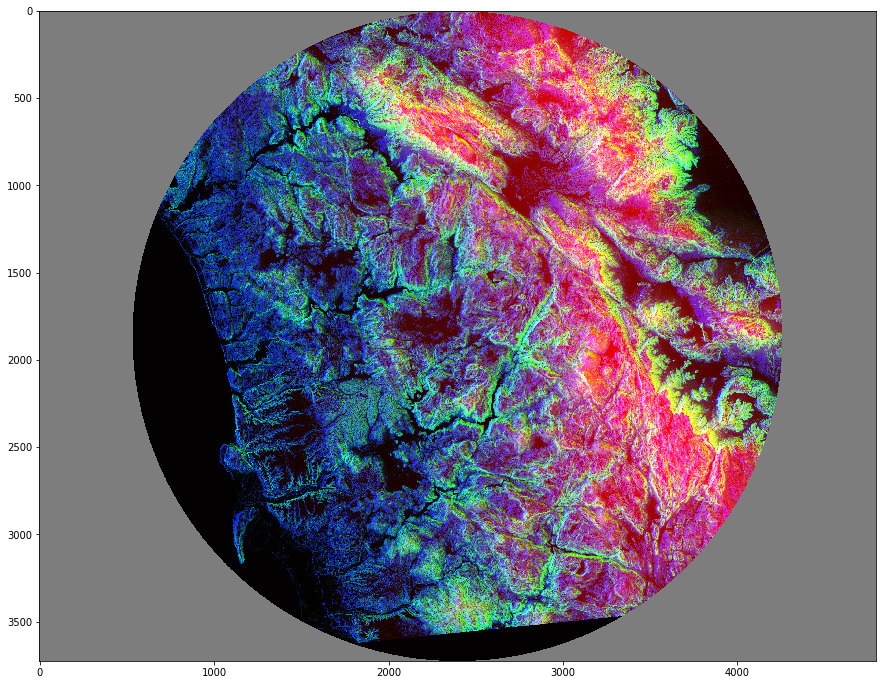

In [19]:
photo_data = misc.imread(image_file)
photo_data[circular_mask] = 125
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

# Otros filtrados

In [ ]:
X, Y = np.ogrid[:total_rows, :total_cols]
half_upper = X < center_row # this line generates a mask for all rows above the center

half_upper_mask = np.logical_and(half_upper, circular_mask)

In [ ]:
import random
photo_data = misc.imread(image_file)
photo_data[half_upper_mask] = 255
#photo_data[half_upper_mask] = random.randint(200,255)
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

# Otros Filtros de Color

## Filtrado de Rojos

In [ ]:
photo_data = misc.imread(image_file)
red_mask   = photo_data[:, : ,0] < 150

photo_data[red_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

## Filtrado de Verdes

In [ ]:
photo_data = misc.imread(image_file)
green_mask = photo_data[:, : ,1] < 150

photo_data[green_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

## Filtrado de Azules

In [ ]:
photo_data = misc.imread(image_file)
blue_mask  = photo_data[:, : ,2] < 150

photo_data[blue_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

## Filtrado de Rojos, Verdes y Azules

In [ ]:
photo_data = misc.imread(image_file)

red_mask   = photo_data[:, : ,0] < 50
green_mask = photo_data[:, : ,1] > 50
blue_mask  = photo_data[:, : ,2] < 50

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)